<a href="https://colab.research.google.com/github/samuelkb/gColab/blob/main/notebooks/Implementing%20gradient%20descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Log-loss vs Mean Squared Error

We already studied the log-loss, but there are many other error functions used for neural netoworks. We will review one more called **Mean squared error**. 

As its name says, this one is the man of the squares of the differences between the predictions and the labels.

In this notebook we will implementing backpropagation with this new function on the same student admissions dataset.

### Gradient descent with Squared Errors

We want to find the weights for our neural networks. Let's start by thinking about the goal. The network needs to make predictions as close as possible to the real values. To measure this, we use a metric of how wrong the predictions are, the **error**. A common metric is the sum of the squared errorrs (SSE):

$$
E = \frac{\mathrm{1} }{\mathrm{2} }\ \sum_{\mu} \sum_{j} [y_j^{\mu} - \hat{y}_j^{\mu}]^2\
$$

Where $\hat{y}$ is the prediction and $y$ is the true value, and you take the sum over all output units $j$ and another sum over all data point $\mu$. This might seem like a really complicated equation at first, but it's fairly simple once you understand the symbols and can saw what's going on in words.

First, the inside summ over $j$. This variable $j$ represents the output units of the network. So this inside sum is saying for each output unit, find the difference between the true value $y$ and the predicted value from the network $\hat{y}$, then square the difference then sum up all those squares.

Then the other sum over $\mu$ is a sum over all the data points. So, for each data point you calculate the inner sum of the squared differences for each output unit. Then you sum up those squared differences for each data point. That gives you the overall error for all the output predictions for all the data points.

The SSE is a good choice for a few reasons. The square ensures the error is always positive and larger errors are penalized more than smaller errors. Also, it makes the math nice, always a plus.

Remember that the output of a neural network, the prediction, depends on the weights:
$$
\hat{y}_j^{\mu} =  f(\sum_{i} w_{ij}·x_i^{\mu})
$$

And accordingly the error depends on the weights:
$$
E = \frac{\mathrm{1} }{\mathrm{2} }\ \sum_{\mu} \sum_{j} [y_j^{\mu} - f(\sum_{i} w_{ij}·x_i^{\mu})]^2\
$$

We want the network's prediction error to be as small as possible and the weights are the knobs we can use to make that happen. Out goal is to find weights $w_{ij}$ that minimize the squared error $E$. To do this with a neural network, typically you'd use **gradient descent**.

### Enter gradient descent

Before to continue with formulas, let's recover our methaphora about the mountain. We are on top of a error mountain and we want to get to the bottom of that mountain. 

We can do it step by step, we look arround us in all the possible directions we can go and find out which direction will get us to descend the most. We take a step in the best direction and we restart the process, we look arround us, and see in which directions we descend the most, and take a step in that direction. And we continue the process until we descend the mountain. Yeah, that algorithm is our gradient descent, used extensively in machine learning. 

The top of our maountain is the problem, and the buttom is the solution, so we take tiny steps in the correct direction that will get us to the solution. In this case, we want to change the weights in steps that reduce the error. Since the fastest way down a mountain is in the steepest direction, the steps taken should be in the direction that minimizes the error the most. We find that direction by calculating the gradient of the squared error.

**Gradient** is another term for rate of change or slope. If you need to bruch up on this concept, check out this [link](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/gradient-and-directional-derivatives/v/gradient).

To calculate a rate of change, we turn to calculus, specifically derivatives. A derivative of a function $f(x)$ gives you another function $f'(x)$ that returns the slope of a $f(x)$ at point $x$. For example, consider $f(x) = x^2$. The derivative of $x^2$ is $f'(x) = 2x$. So, at $x = 2$, the slope is $f'(2) = 4$. Plotting this out, it looks like:

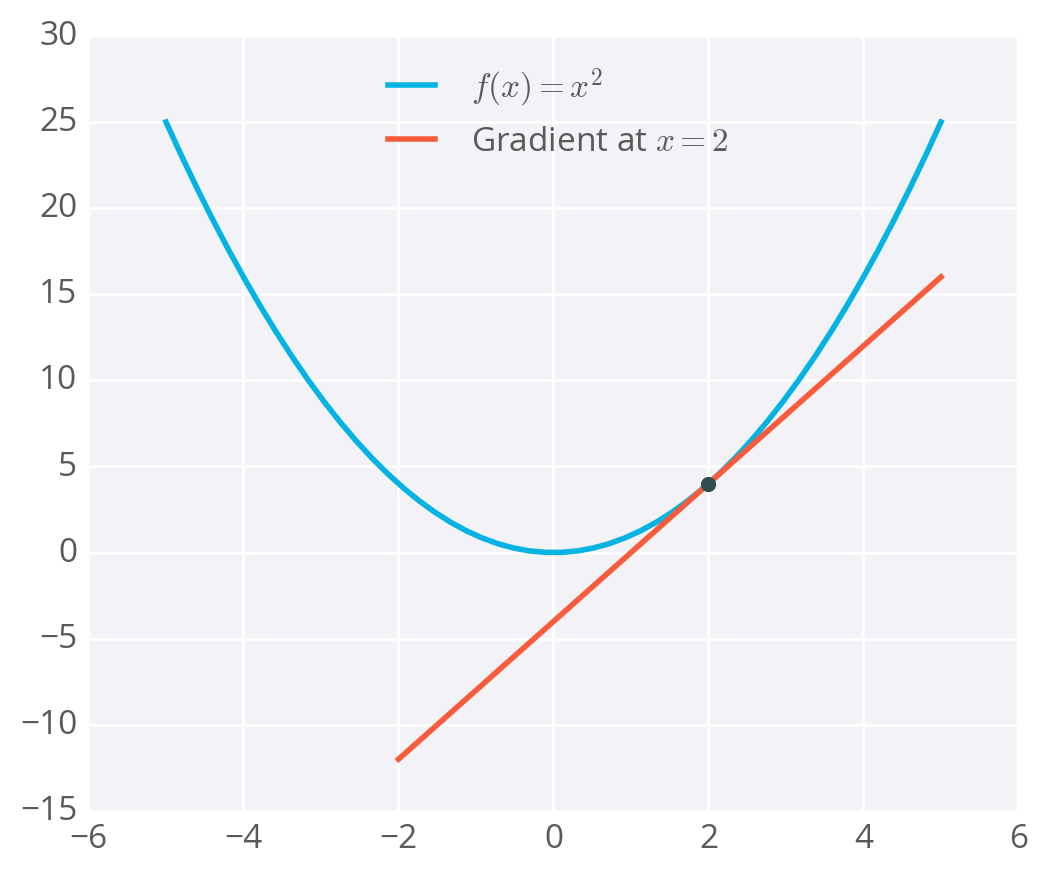

The gradient is just a derivative generalized to functions with more than one variable. We can use calculus to find the gradient at any point in our error function, which depends on the input weights. You'll see how the gradient descent step is derived later.

For now, let's see an example of the error of a neural network with two inputs, and accordingly, two weights. You can read this like a topographical map where points on a contour line have the same error and darker contour lines correspond to larger errors. 

At each step, you calculate the error and the gradient, then use those to determine how much to change each weight. Repeating this process will eventually find weights that are close to the minimum of the error function, the black dot in the middle.

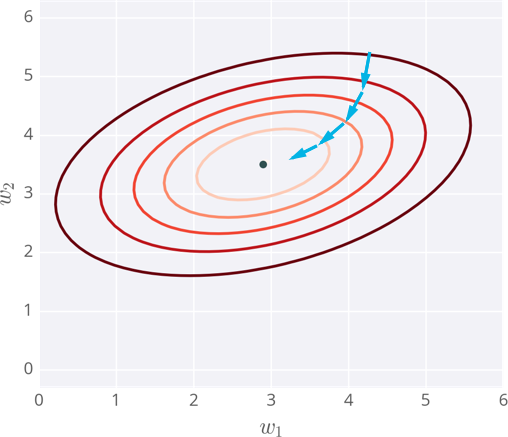

### Caveats

Since the weights will just go wherever the gradient takes them, they can end up where the error is low, but not the lowest. These spots are called **local minima**. If the weights are initialized with the wrong values, gradient descent could lead the weights into a local minimum: 

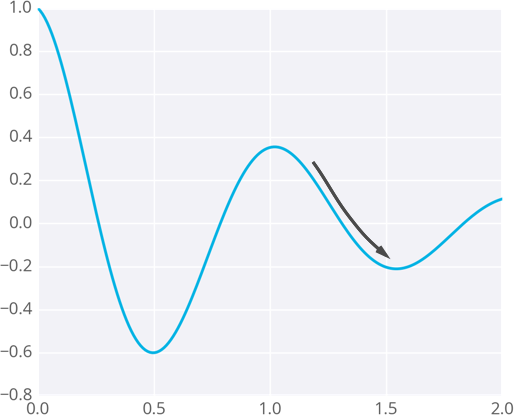

There are methods to avoid this, such as using **momentum**, you can read more about it [here](https://distill.pub/2017/momentum/).

### Gradient descent: The math

Now we know how to get an output from a simple neural network like the one shown I show you:

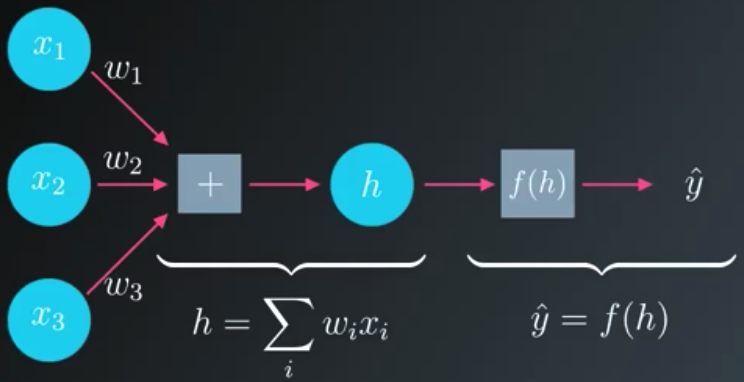

We would like to use the output to make predictions, but how do ve build this network to make predictions without knowing the correct weights before hand? What we can do is present it with data that we know to be true, then set the model parameters, the weights to match that data. 

First, we need some measure of how bad our predictions are. The obvious choice is to use the difference : $E = (y - \hat{y})$ (where $y \rightarrow$ true target value, and $\hat{y} \rightarrow$ the network output).

However, if the prediction is too high, this error will be negative and if their prediction is too low by the same amount the error will be positive. We would rather treat these errors the same. To make both cases positive we will just square the error: $E = (y - \hat{y})^2$. We don't take the absolute value, because one benefit of using the square is that it penalizes outliers more than small errors, also squaring the error makes the math nice later.

We have the error for just one prediction though. We would rather like to know the error for the entire dataset. So, we will just sum up the errors for each data record denoted by the sum over $\mu$:
$$
E = \sum_{\mu} ( y^{\mu} - \hat{y}^{\mu})^2
$$

Now, we have the total error for the network over the entire dataset. Finally, we will add a one half in front because it cleans up the math later. This formulation is typically called the sum of the squared errors:
$$
E = \frac{\mathrm{1} }{\mathrm{2} } \sum_{\mu} ( y^{\mu} - \hat{y}^{\mu})^2
$$

Remember that $\hat{y}$ is the linear combination of the weights and inputs passed through that activation function:
$$
E = \frac{\mathrm{1} }{\mathrm{2} } \sum_{\mu} ( y^{\mu} - f(\sum_{i}w_i · x_i^{\mu}))^2
$$

We can see that the error depends on the weights ($w_1$), and the input values ($x_i$). Remeber, $\mu$ are the data records.

You can think of data as two tables or arrays, or matrices, whatever works for you.

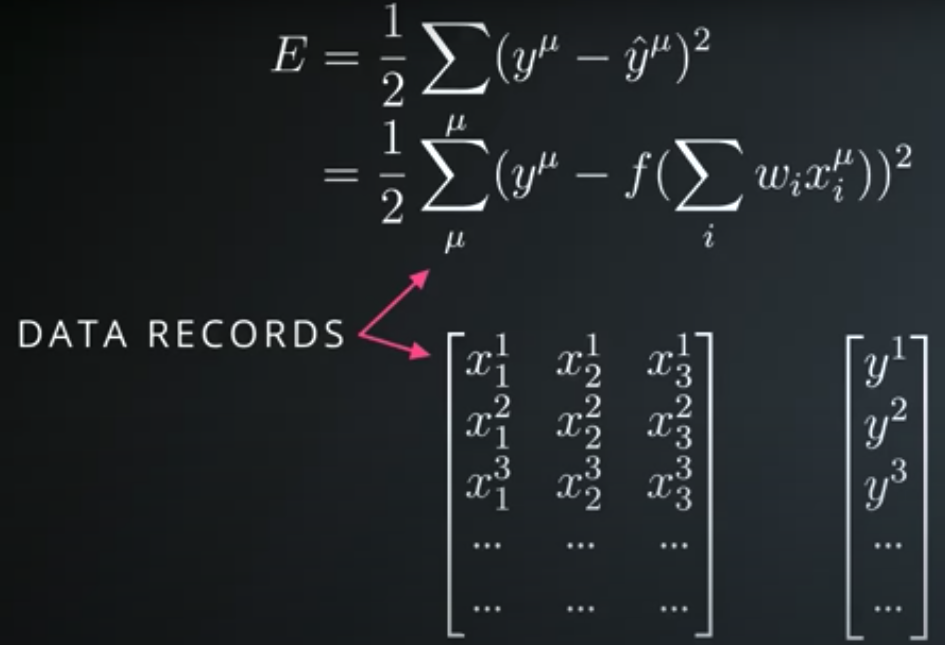

One contains the input data, x, and the other contains the targets, y.

Each record is one row here, so $\mu = 1$ is the first row. ($[x_1^1, x_2^1, x_3^1]  [y^1] \rightarrow \mu = 1$)

Then, to calculate the total error, you are just scanning through the rows of these arrays and calculating the SSE, then summing up all of those results.

The SSE is a measure of our network's performance. If it is high, the network is making bad predictions. If it is low, the network is making good predictions. So we want to make it as small as possible. 

Going forward, let's consider a simple example with only one data record to make it easier to understand how we will minimize the error. 

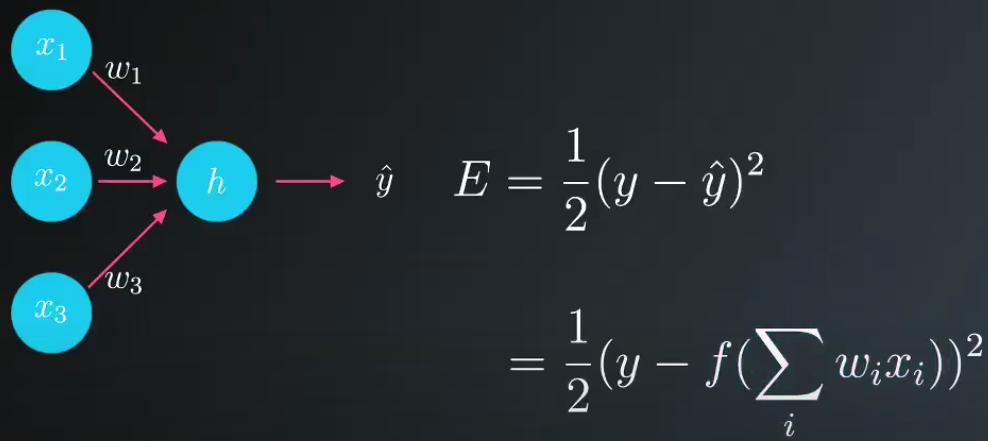

We have that the error is a function of the weights. 

The weights are the knobs we can use to alter the network's predictions which in turn affects the overall error. Then our goal is to find weights that mininize the error. 

Here we can see a simple depiction of the error with one weight. 

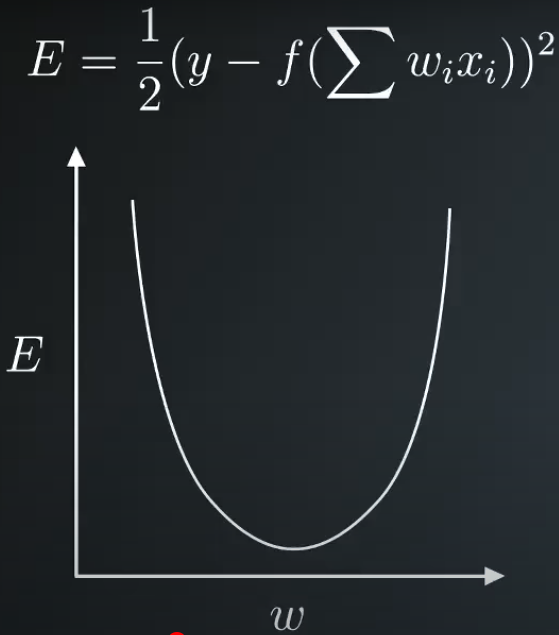

We want to find the weight at the bottom of this bowl.

Starting at some random weight, we want to make a step in the direction towards the minimum. This direction is the opossite to the gradient, the slope: $\Delta w = - gradient$. If we take many steps, always descending down a gradient, eventually the weight will find the minimum of the error function, it means, the gradient descent.

We want to update the weight:

$$
w_i = w_i + \Delta w_i
$$

So a new weight $w_1$ is the old weight plus the weight step $\Delta w_i$. Remember, $\Delta$ typically signifies change. 

The weight step is proportional to the gradient, the partial derivative of the error with respect to each weight:
$$
\Delta w_i \propto - \frac{\mathrm{\partial E} }{\mathrm{\partial w_i} }
$$

We can add in an arbitrary scaling parameter that allows us to set the size of the gradient descent steps, this is called the learning rate, signified by the Greek letter eta($\eta$):
$$
\Delta w_i = - \eta \frac{\mathrm{\partial E} }{\mathrm{\partial w_i} }
$$

Calculating the gradient here requires multivariable calculus, here a [link]() for your help. 

Writting out the gradient, you get th partial derivative with respect the weights of the SSE:

$$
\frac{\mathrm{\partial E} }{\mathrm{\partial w_i}} = \frac{\mathrm{\partial E} }{\mathrm{\partial w_i}} · \frac{\mathrm{1} }{\mathrm{2}} · (y - \hat{y})^2
$$

The network output is a function of weights, so we hav here a function of another function that depends on the weights:

$$
= \frac{\mathrm{\partial E} }{\mathrm{\partial w_i}} · \frac{\mathrm{1} }{\mathrm{2}} · (y - \hat{y}(w_i))^2
$$

So we use chain rule to calculate the derivative:

$$
\frac{\mathrm{\partial} }{\mathrm{\partial z}}p(q(z)) = \frac{\mathrm{\partial p} }{\mathrm{\partial q}} · \frac{\mathrm{\partial q} }{\mathrm{\partial z}}
$$

Where $q = (y - \hat{y}(w_i))$ and $p = \frac{\mathrm{1} }{\mathrm{2}}q(w_i)^2$, and the derivative of p with respect to q returns the error itself:

$$
\frac{\mathrm{\partial} E}{\mathrm{\partial w_i}} = (y - \hat{y}) · \frac{\mathrm{\partial} }{\mathrm{\partial w_i}} · (y - \hat{y})
$$

The $2$ in the exponent drops down and cancels out the $1/2$, then we are left with the derivative of the error with respect to $w_i$.

The target value $y$ doesn't depend on the weights, but $\hat{y}$ does. We use the chain rule again, the minus sign comes out in front and we are left with th partial derivative of $\hat{y}$

$$
= - (y - \hat{y}) · \frac{\mathrm{\partial} \hat{y}}{\mathrm{\partial w_i}}
$$


If we remember, $\hat{y}$ is equal to the activation function at $h$:

$$
\hat{y} = f(h)
$$

Where $h$ is the linear combination of the weights and input values:

$$
h = \sum_{i} w_i x_i
$$

Taking the derivate of $\hat{y}$ and again using the chain rule:

$$
= - (y - \hat{y})f'(h) · \frac{\mathrm{\partial}}{\mathrm{\partial w_i}} · \sum w_i x_i
$$

In the sum, there is only one term that depends on each weight, writing this out for weight one, we see that only the first term with $x_1$ depends on $w_1$:

$$
= \frac{\mathrm{\partial}}{\mathrm{\partial w_1}} [w_1 x_1 + w_2 x_2 + ... w_n x_n]
$$

Then, the partial derivative of the sum with respect to weight one is just $x_1$:

$$
= x_1 + 0 + 0 + 0...
$$

Then the partial derivative of this sum with respect to $w_1$ is just $x_1$:

$$
\frac{\mathrm{\partial}}{\mathrm{\partial w_i}} · \sum w_i x_i = x_1
$$

So we finally put all this together, the gradient of the squared error with respect to $w_i$ is the negative of the error times the derivative of the activation function at $h$ times the input value $x_i$:

$$
\frac{\mathrm{\partial E}}{\mathrm{\partial w_i}} = - (y - \hat{y}) · f'(h)x_i 
$$


Then, the weight step is a learning rate $\eta$ times the error, times the activation derivative, times the input value: 

$$
\Delta w_i = \eta (y - \hat{y}) f'(h)x_i 
$$

For convenience, we can define an error term $\delta$ as the error times the activation function derivative at $h$:

$$
\delta = (y - \hat{y})f'(h)
$$

Then, we can write our weight update as:

$$
w_i = w_i + \eta \delta x_i
$$

You might be working with multiple output units. You can think of this as just stacking the architecture from the single output network but connecting the input units to the new output units.

Now the total error would include the error of each outputs sum together:

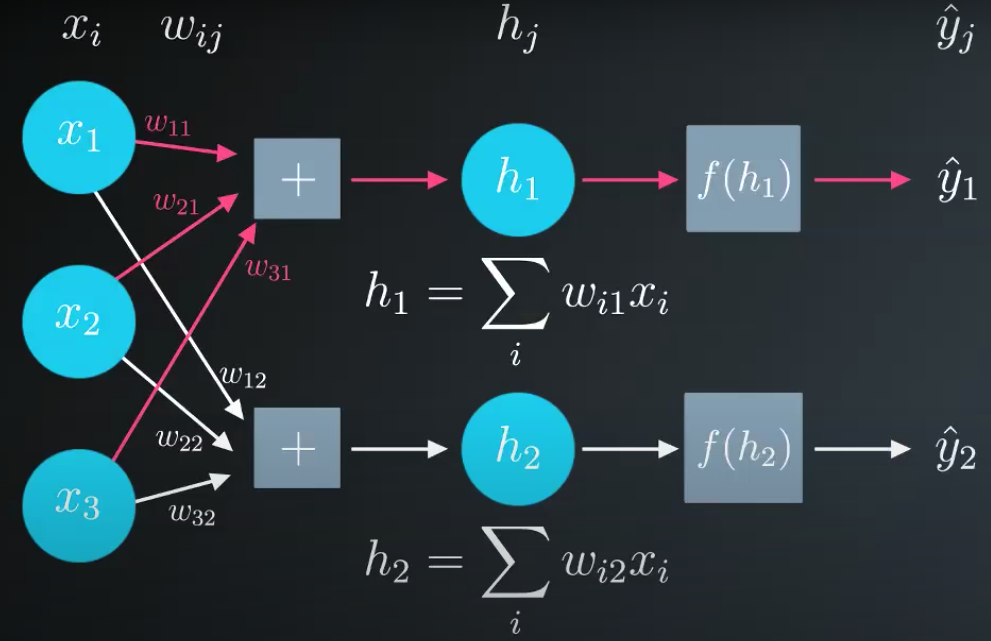

The gradient descent step can be extended to a network with multiple outputs by calculating an error term for each output unit denoted with the $_j$:

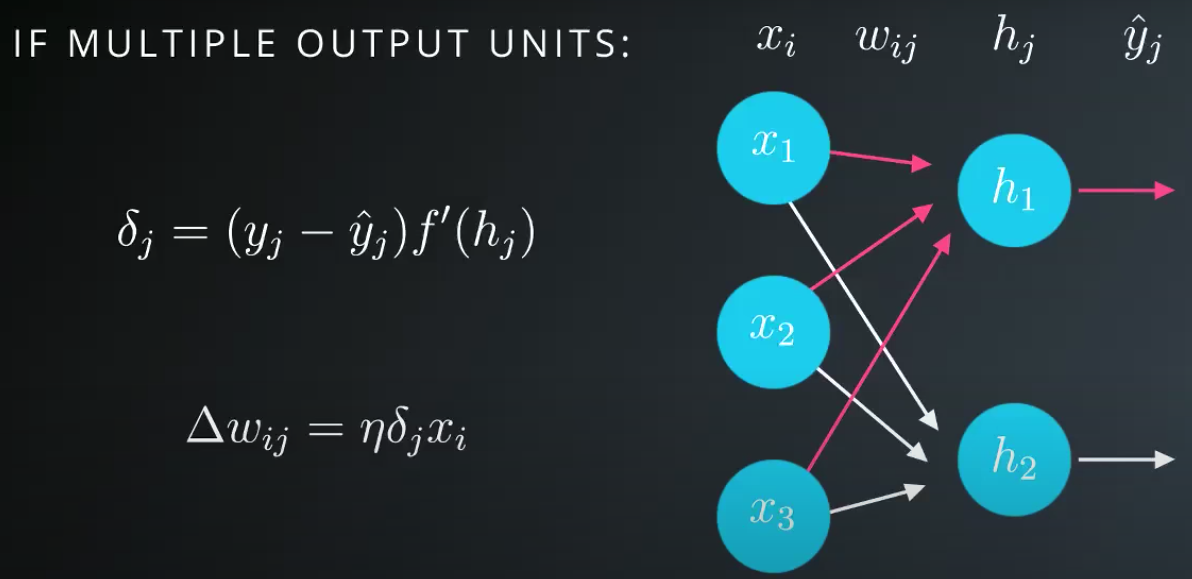